In [1]:
# tyler: countries education rate vs malnutrition rate AND 
# countries education rate vs fertility (# of children per woman)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
edu_df = pd.read_csv('Clean Education.csv')
nut_df = pd.read_csv('Clean School Aged Nutrition.csv')
demog_df = pd.read_csv('Cleaned Demographics.csv')

In [3]:
tylerData1 = pd.merge(edu_df, nut_df)
tylerDataComplete = pd.merge(tylerData1, demog_df)

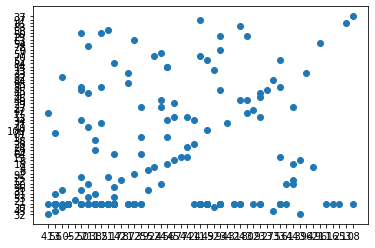

In [4]:
plt.scatter(tylerDataComplete['Total fertility  (live births per woman) 2018'], tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'])

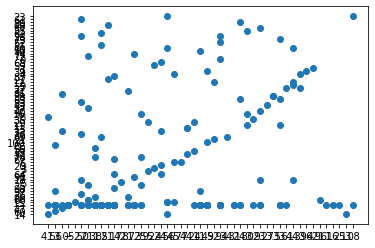

In [5]:
plt.scatter(tylerDataComplete['Total fertility  (live births per woman) 2018'], tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'])

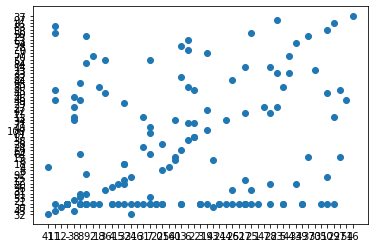

In [6]:
plt.scatter(tylerDataComplete['Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children'], tylerDataComplete['Completion rate 2012–2018, Upper secondary education, male'])

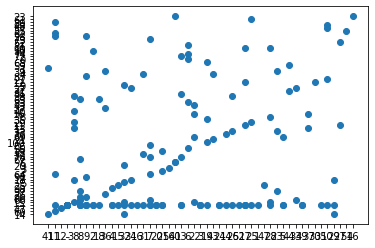

In [7]:
plt.scatter(tylerDataComplete['Malnutrition among preschool-aged children (0–4 years of age) 2013–2018*: Stunted (%) (moderate and severe): all children'], tylerDataComplete['Completion rate 2012–2018, Upper secondary education, female'])